In [21]:
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi

In [47]:
def _7mod15():
        
    circ = QuantumCircuit(8)
    circ.x(4)
    circ.cx(0,5)
    circ.cx(0,6)
    circ.cx(1,4)
    circ.cx(1,6)
    for i in range(4,8):
        circ.ccx(0,1,i)
    gate = circ.to_gate()
    gate.name = "7^x mod 15"
    return gate

In [48]:
def QFT(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)
        
        for j in range(i - 1, -1, -1): 
            qft_circ.cu1(pi/(2 ** (i - j)), j, i)
 
        
    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    return  gate

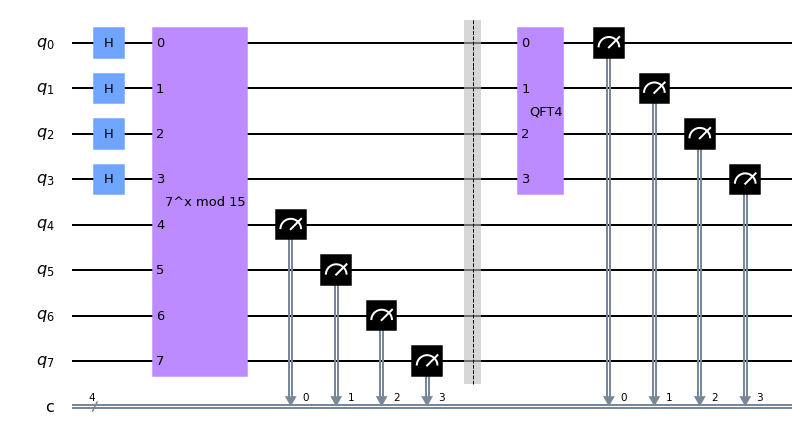

In [62]:
circ = QuantumCircuit(8,4)
circ.h(range(4))
circ.append(_7mod15(), range(8))
circ.measure(range(4,8),range(4))
circ.barrier(range(8))
circ.append(QFT(4), range(4))
circ.measure(range(4), range(4))
circ.draw(output = 'mpl')

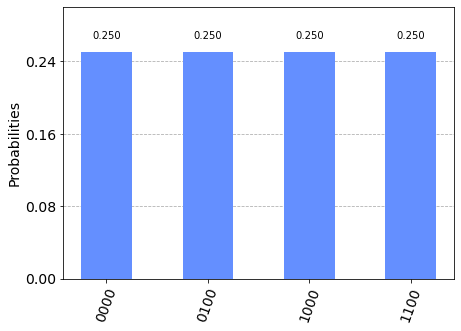

In [61]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 100000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [4]:
# con esto sabemos que 4 es raiz cuadrada ya que el mcd de 4 8 12 es 4
# sabiendo esto podemos calcular los factores primos de la siguiente manera:

import math

primer_factor = math.gcd(4-1, 15)
segundo_factor = math.gcd(4+1, 15)
print("factores primos:", primer_factor, segundo_factor)

factores primos: 3 5
